# ESTUDO SOBRE OCORRÊNCIAS AERONÁUTICAS NA AVIAÇÃO CIVIL BRASILEIRA E APLICAÇÃO DE MODELOS DE MACHINE LEARNING PARA CLASSIFICAÇÃO DOS TIPOS DE OCORRÊNCIA

## Fontes

Fonte dos dados: https://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira

Datasets baixados em: 28/12/2021

Cobertura Temporal: 03/01/2010 a 18/08/2021

## Versão do Python

In [ ]:
!python --version

Python 3.7.12


In [ ]:
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

# 1. Introdução



## 1.1. Contextualização

Em novembro do ano de 2021, o Brasil chorou e lamentou a perda de uma das maiores e mais poderosas vozes sertanejas da atualidade em um acidente aéreo. A partir de eventos como esse e a massiva divulgação de casos semelhantes por parte da mídia, somos instigados a buscar mais informações sobre ocorrências aéreas na aviação civil brasileira.

Motivado pela curiosidade, realizei pesquisas sobre dados públicos de acidentes aéreos e encontrei um órgão do Comando da Aeronáutica chamado Centro de Investigação e Prevenção de Acidentes Aeronáuticos (CENIPA), que é responsável por investigar acidentes aeronáuticos da aviação civil e da Força Aérea Brasileira. Porém, suas investigações não tem objetivo de apontar culpados pelos acidentes, mas sim o de gerar recomendações de segurança específicas e objetivas por meio dos ensinamentos obtidos pelos fatos analisados.

É com base nos dados disponibilizados por esse órgão que se pretende realizar o estudo sobre as ocorrências aeronáuticas na aviação civil brasileira.


## 1.2. O Problema Proposto

A definição de acidente aéreo, segundo o CENIPA é: toda ocorrência relacionada com a operação de uma aeronave, havida entre o período em que uma pessoa nela embarca com a intenção de realizar um voo, até o momento em que todas as pessoas tenham dela desembarcado.

Para auxiliar no entendimento do problema proposto, utilizamos a técnica dos 5 W’s, ou seja, perguntas cujas respostas são consideradas básicas na coleta de informações ou solução de problemas.

- **Por que? (Why?)**:

- **Quem? (Who?)**: O presente projeto tem como objetivo trabalhar sobre os dados abertos de ocorrências de acidentes aéreos gerenciados pelo Centro de Investigação e Prevenção de Acidentes Aeronáuticos (CENIPA). 

- **O que? (What?)**: Utilizaremos a análise exploratória sobre os dados com objetivos de extrair informações de valor, utilizar ao menos três algoritmos de predição (Machine Learning) para <uma tarefa de classificação a definir> e selecionar o mais eficiente. 

- **Onde? (Where?)**: Trataremos somente de ocorrências aeronáuticas registradas dentro do território brasileiro.

- **Quando? (When?)**: O período analisado é entre 01/2010 a 08/2021.




# 2. Coleta de Dados



Como já mencionado anteriormente, os dados referentes às ocorrências aeronáuticas da aviação civil brasileira são geridos e disponibilizados pelo CENIPA, e foram obtidos diretamente no sitio do Portal Brasileiros de Dados Abertos, no dia 28/12/2021, por meio da URL https://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira.
 
O CENIPA disponibilizou 5 tabelas, no formato .csv (comma separated values), que tratam dos seguintes domínios:
1.	OCORRENCIA - Informações sobre as ocorrências. 
2.	OCORRENCIA_TIPO - Informações sobre o tipo de ocorrência.
3.	AERONAVE - Informações sobre as aeronaves envolvidas nas ocorrências.
4.	FATOR_CONTRIBUINTE - Informações sobre os fatores contribuinte das ocorrências que tiveram investigações finalizadas.
5.	RECOMENDACAO - Informações sobre as recomendações de segurança geradas nas ocorrências.

# 3. Processamento/Tratamento de Dados

Nessa seção você deve deixar registrado todo o processamento e tratamento feitos sobre os dados obtidos. É importante que você informe a quantidade de registros obtidos, a quantidade de registros duplicados ou com informações ausentes, que tratamento você deu para cada problema encontrado em seus datasets, etc. Você deve descrever cada passo de forma minuciosa, de forma que outra pessoa consiga reproduzir o seu processamento/tratamento de forma precisa. Justifique as decisões tomadas no tratamento dos dados. Por exemplo: para os valores ausentes para o campo X eu decidi preenchê-los utilizando o cálculo da média aritmética pelo motivo ..., e então justifique sua decisão.

## Importando bibliotecas

In [ ]:
# Importando as bibliotecas
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Importando e entendendo os dados

In [ ]:
# Possíveis valores faltantes identificados
missing_values = ['***','****','*****','####','###!','000']

# Importando os dados originais
ocorrencia = pd.read_csv('/content/drive/MyDrive/PUC Minas/CENIPA/ocorrencia.csv', 
                              sep=';', na_values=missing_values)
ocorrencia_tipo = pd.read_csv('/content/drive/MyDrive/PUC Minas/CENIPA/ocorrencia_tipo.csv', 
                              sep=';', na_values=missing_values)
aeronave = pd.read_csv('/content/drive/MyDrive/PUC Minas/CENIPA/aeronave.csv', 
                              sep=';', na_values=missing_values)
fator_contribuinte = pd.read_csv('/content/drive/MyDrive/PUC Minas/CENIPA/fator_contribuinte.csv', 
                              sep=';', na_values=missing_values)
recomendacao = pd.read_csv('/content/drive/MyDrive/PUC Minas/CENIPA/recomendacao.csv', 
                              sep=';', na_values=missing_values)

## Tratamento do dataset ocorrencia.csv

Em seguida, retornamos informações do Dataframe ocorrencia por meio do seu método info(). Esse método retorna informações como colunas, número de valores não nulos, tipos de dados, total de observações, etc.Em seguida, retornamos informações do Dataframe ocorrencia por meio do seu método info(). Esse método retorna informações como colunas, número de valores não nulos, tipos de dados, total de observações, etc.

In [ ]:
ocorrencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6114 entries, 0 to 6113
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   codigo_ocorrencia               6114 non-null   int64  
 1   codigo_ocorrencia1              6114 non-null   int64  
 2   codigo_ocorrencia2              6114 non-null   int64  
 3   codigo_ocorrencia3              6114 non-null   int64  
 4   codigo_ocorrencia4              6114 non-null   int64  
 5   ocorrencia_classificacao        6114 non-null   object 
 6   ocorrencia_latitude             3819 non-null   object 
 7   ocorrencia_longitude            3817 non-null   object 
 8   ocorrencia_cidade               6114 non-null   object 
 9   ocorrencia_uf                   6112 non-null   object 
 10  ocorrencia_pais                 6114 non-null   object 
 11  ocorrencia_aerodromo            3658 non-null   object 
 12  ocorrencia_dia                  61

Assim como vimos no Modelo de Dados apresentado no capítulo 2, o dataset possui cinco atributos referentes ao código da ocorrência. Esse atributo foi replicado exclusivamente para servir de relacionamento entre os demais datasets. Uma vez que um único atributo permite relacionar os conjuntos de dados, os atributos codigo_ocorrencia1, codigo_ocorrencia2, codigo_ocorrencia3 e codigo_ocorrencia4 podem ser removidos.

In [ ]:
# Verificando se os códigos de ocorrência foram replicados 
valores_totalmente_replicados = len(ocorrencia.query('codigo_ocorrencia == codigo_ocorrencia1 &'+
                 'codigo_ocorrencia == codigo_ocorrencia2 &'+
                 'codigo_ocorrencia == codigo_ocorrencia3 &'+
                 'codigo_ocorrencia == codigo_ocorrencia4'))

print(f'Total de ocorrências no dataset:{ocorrencia.shape[0]} \n' +
      f'Total de ocorrências com valores totalmente replicados: {valores_totalmente_replicados}')

Total de ocorrências no dataset:6114 
Total de ocorrências com valores totalmente replicados: 6114


In [ ]:
ocorrencia['ocorrencia_pais'].value_counts()

BRASIL    6114
Name: ocorrencia_pais, dtype: int64

Além da remoção dos atributos mencionados acima, efetuei a remoção de outros atributos que considero irrelevantes para o projeto.

In [ ]:
# Remoção de colunas 
ocorrencia.drop(columns=['codigo_ocorrencia1',
                         'codigo_ocorrencia2',
                         'codigo_ocorrencia3',
                         'codigo_ocorrencia4',
                         'ocorrencia_latitude',
                         'ocorrencia_longitude',
                         'ocorrencia_cidade',
                         'ocorrencia_pais',
                         'ocorrencia_aerodromo',
                         'investigacao_aeronave_liberada',
                         'investigacao_status',
                         'divulgacao_relatorio_numero',
                         'divulgacao_relatorio_publicado',
                         'divulgacao_dia_publicacao',
                         'total_recomendacoes',
                         ], inplace=True)

In [ ]:
# Renomeando a coluna total_aeronaves_envolvidas
ocorrencia.rename(columns={'total_aeronaves_envolvidas':
                           'ocorrencia_aeronaves_envolvidas'}, 
                            inplace=True)

In [ ]:
ocorrencia.head()

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_uf,ocorrencia_dia,ocorrencia_hora,ocorrencia_aeronaves_envolvidas,ocorrencia_saida_pista
0,40211,INCIDENTE,RJ,03/01/2010,12:00:00,1,NÃO
1,40349,INCIDENTE,PA,03/01/2010,11:05:00,1,NÃO
2,40351,INCIDENTE,RJ,03/01/2010,03:00:00,1,NÃO
3,39527,ACIDENTE,MT,04/01/2010,17:30:00,1,NÃO
4,40324,INCIDENTE,RS,05/01/2010,19:25:00,1,NÃO


O próximo passo será a transformação de alguns atributos do nosso dataset. O atributo ocorrencia_dia, por exemplo, nos informa a data da ocorrência sofrida por alguma ae-ronave. Para o nosso estudo, será mais interessante que trabalhemos apenas com o ano. 

Para isso, as próximas linhas de código tratam da extração do ano a partir da data da ocorrência e atribuição em um novo atributo chamado ocorrencia_ano, conversão da tipo object deste atributo para o tipo inteiro e remoção do atributo ocorrencia_dia.


In [ ]:
# Criando o atributo ocorrencia_ano a partir do atributo ocorrencia_dia
ocorrencia['ocorrencia_ano'] = ocorrencia['ocorrencia_dia']\
        .apply(lambda x : x.replace(x,x[-4:]))

# Convertendo o tipo do atributo ocorrencia_ano para inteiro
ocorrencia = ocorrencia.astype({'ocorrencia_ano': 'int32',
                                'ocorrencia_aeronaves_envolvidas':'int32'})

# Removendo o atributo ocorrencia_dia
ocorrencia.drop(columns=['ocorrencia_dia'], inplace=True)

In [ ]:
'''
  Função recebe a pd.Series com strings referentes a horários  e retorna 
  uma lista de períodos com os valores MANHÃ, TARDE, NOITE ou MADRUGADA
'''
def faixa_periodo_dia(series):
    periodo = []

    for valor in series:
      if not isinstance(valor, str):
        valor = '00:00:00'

      hora_valor = int(valor[:2])
      minuto_valor = int(valor[3:5])
      segundo_valor = int(valor[6:])
      hora = datetime.time(hora_valor,minuto_valor,segundo_valor)
    
      if datetime.time(0,0,0) <= hora < datetime.time(5,59,59):
        periodo.append('MADRUGADA')
      elif datetime.time(6,0,0) <= hora < datetime.time(11,59,59):
        periodo.append('MANHÃ')
      elif datetime.time(12,0,0) <= hora < datetime.time(17,59,59):
        periodo.append('TARDE')
      elif datetime.time(18,0,0) <= hora < datetime.time(23,59,59):
        periodo.append('NOITE')

    return periodo

In [ ]:
# Recebe a lista de períodos identificados a partir da lista de ocorencias
lista_periodos = faixa_periodo_dia(ocorrencia['ocorrencia_hora'])

# Adiciona o atributo ocorrencia_periodo
ocorrencia['ocorrencia_periodo'] = pd.Series(lista_periodos)

# Removendo o atributo ocorrencia_hora
ocorrencia.drop(columns=['ocorrencia_hora'], inplace=True)

In [ ]:
ocorrencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6114 entries, 0 to 6113
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   codigo_ocorrencia                6114 non-null   int64 
 1   ocorrencia_classificacao         6114 non-null   object
 2   ocorrencia_uf                    6112 non-null   object
 3   ocorrencia_aeronaves_envolvidas  6114 non-null   int32 
 4   ocorrencia_saida_pista           6114 non-null   object
 5   ocorrencia_ano                   6114 non-null   int32 
 6   ocorrencia_periodo               6114 non-null   object
dtypes: int32(2), int64(1), object(4)
memory usage: 286.7+ KB


In [ ]:
'''
  Função responsável pelo preenchimento do valores nulos de uma lista de atributos
  Entrada: Dataframe, Lista de atributos afetados e valor a ser preenchido
'''
def preenche_nulos(dataframe, lista_colunas, valor):
  for coluna in lista_colunas:
    dataframe[coluna].fillna(valor, inplace=True)

In [ ]:
preenche_nulos(ocorrencia,['ocorrencia_uf'],'NÃO INFORMADO')

In [ ]:
ocorrencia.isna().sum()

codigo_ocorrencia                  0
ocorrencia_classificacao           0
ocorrencia_uf                      0
ocorrencia_aeronaves_envolvidas    0
ocorrencia_saida_pista             0
ocorrencia_ano                     0
ocorrencia_periodo                 0
dtype: int64

In [ ]:
ocorrencia.head()

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_uf,ocorrencia_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_ano,ocorrencia_periodo
0,40211,INCIDENTE,RJ,1,NÃO,2010,TARDE
1,40349,INCIDENTE,PA,1,NÃO,2010,MANHÃ
2,40351,INCIDENTE,RJ,1,NÃO,2010,MADRUGADA
3,39527,ACIDENTE,MT,1,NÃO,2010,TARDE
4,40324,INCIDENTE,RS,1,NÃO,2010,NOITE


## Tratamento do dataset ocorrencia_tipo.csv

In [ ]:
ocorrencia_tipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6283 entries, 0 to 6282
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   codigo_ocorrencia1         6283 non-null   int64 
 1   ocorrencia_tipo            6283 non-null   object
 2   ocorrencia_tipo_categoria  6283 non-null   object
 3   taxonomia_tipo_icao        6283 non-null   object
dtypes: int64(1), object(3)
memory usage: 196.5+ KB


In [ ]:
# Renomeando a coluna codigo_ocorrencia1 para codigo_ocorrencia
ocorrencia_tipo.rename(columns={"codigo_ocorrencia1":"codigo_ocorrencia"}, inplace=True)

In [ ]:
# Marca e retorna todas as duplicatas
todas_duplicatas = ocorrencia_tipo['codigo_ocorrencia'].duplicated(keep=False).sum()

# Marca todas as duplicatas com exceção da primeira ocorrência
duplicatas_sem_primeira_ocorrencia = ocorrencia_tipo['codigo_ocorrencia'].duplicated(keep='first').sum() 

print(f'Total de duplicatas: {todas_duplicatas} \n'+
      f'Total de duplicatas sem a primeira ocorrência: {duplicatas_sem_primeira_ocorrencia}')

Total de duplicatas: 331 
Total de duplicatas sem a primeira ocorrência: 169


In [ ]:
# Filtro marcando as duplicatas como True, com exceção da primeira ocorrência 
filtro_duplicatas = ocorrencia_tipo['codigo_ocorrencia'].duplicated(keep='first')

# Obter o índice das duplicatas
indices = ocorrencia_tipo[filtro_duplicatas].index

# Remover os registros das duplicatas usando o índice como referência
ocorrencia_tipo.drop(indices, inplace=True)

# Criando um novo Dataframe apenas com as atributos codigo_ocorrencia e 
# ocorrencia_tipo
tipo_ocorrencia = ocorrencia_tipo[['codigo_ocorrencia','ocorrencia_tipo']]

ocorrencia_com_tipo_associado = len(tipo_ocorrencia['codigo_ocorrencia'].unique())

print(f"Número de ocorrências com tipo associado:" +
      f" {ocorrencia_com_tipo_associado}")

Número de ocorrências com tipo associado: 6114


In [ ]:
# Realizando o join para juntar o Dataframe tipo_ocorrencia ao Dataframe ocorrencia
# utilizando o codigo_ocorrencia como chave
ocorrencia = ocorrencia.join(tipo_ocorrencia.set_index('codigo_ocorrencia'), on='codigo_ocorrencia')

In [ ]:
ocorrencia.head()

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_uf,ocorrencia_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_ano,ocorrencia_periodo,ocorrencia_tipo
0,40211,INCIDENTE,RJ,1,NÃO,2010,TARDE,TRÁFEGO AÉREO
1,40349,INCIDENTE,PA,1,NÃO,2010,MANHÃ,COLISÃO COM AVE
2,40351,INCIDENTE,RJ,1,NÃO,2010,MADRUGADA,COLISÃO COM AVE
3,39527,ACIDENTE,MT,1,NÃO,2010,TARDE,OPERAÇÃO A BAIXA ALTITUDE
4,40324,INCIDENTE,RS,1,NÃO,2010,NOITE,OUTROS


## Tratamento do dataset aeronave.csv

Nesta seção faremos o tratamento do arquivo aeronave.csv, que possui 23 colunas e 6188 registros. Assim como procedi no tratamento do arquivo ocorrencia.csv, farei o ajuste no nome da coluna codigo_ocorrencia2 e efetuarei a remoção de atributos irrelavantes para este projeto.

In [ ]:
aeronave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6188 entries, 0 to 6187
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo_ocorrencia2           6188 non-null   int64  
 1   aeronave_matricula           6174 non-null   object 
 2   aeronave_operador_categoria  3002 non-null   object 
 3   aeronave_tipo_veiculo        6048 non-null   object 
 4   aeronave_fabricante          5825 non-null   object 
 5   aeronave_modelo              6036 non-null   object 
 6   aeronave_tipo_icao           5926 non-null   object 
 7   aeronave_motor_tipo          5981 non-null   object 
 8   aeronave_motor_quantidade    6106 non-null   object 
 9   aeronave_pmd                 5970 non-null   float64
 10  aeronave_pmd_categoria       5970 non-null   float64
 11  aeronave_assentos            5745 non-null   float64
 12  aeronave_ano_fabricacao      5694 non-null   float64
 13  aeronave_pais_fabr

In [ ]:
# Renomeando a coluna
aeronave.rename(columns={'codigo_ocorrencia2':'codigo_ocorrencia'},\
                inplace=True)

In [ ]:
# Remoção de colunas irrelevantes para o projeto
aeronave.drop(columns=['aeronave_matricula',
                         'aeronave_operador_categoria',
                         'aeronave_tipo_icao',
                         'aeronave_pmd_categoria',
                         'aeronave_assentos',
                         'aeronave_ano_fabricacao',
                         'aeronave_modelo',
                         'aeronave_pais_fabricante',
                         'aeronave_pais_registro',
                         'aeronave_registro_categoria',
                         'aeronave_voo_origem',
                         'aeronave_voo_destino',
                         'aeronave_tipo_operacao'], inplace=True)

In [ ]:
# Preenchendo os atributos numéricos com o valor 0
preenche_nulos(aeronave,['aeronave_pmd','aeronave_fatalidades_total'],0)

# Preenchendo os categóricos categóricos com 'NÃO INFORMADO'
preenche_nulos(aeronave,['aeronave_tipo_veiculo', 'aeronave_fabricante',
                       'aeronave_motor_tipo',
                       'aeronave_motor_quantidade',
                       'aeronave_registro_segmento','aeronave_fase_operacao',
                       'aeronave_nivel_dano'],'NÃO INFORMADO')

In [ ]:
# Convertendo os atributos float para int

aeronave = aeronave.astype({'aeronave_fatalidades_total': 'int32'})

In [ ]:
aeronave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6188 entries, 0 to 6187
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   codigo_ocorrencia           6188 non-null   int64  
 1   aeronave_tipo_veiculo       6188 non-null   object 
 2   aeronave_fabricante         6188 non-null   object 
 3   aeronave_motor_tipo         6188 non-null   object 
 4   aeronave_motor_quantidade   6188 non-null   object 
 5   aeronave_pmd                6188 non-null   float64
 6   aeronave_registro_segmento  6188 non-null   object 
 7   aeronave_fase_operacao      6188 non-null   object 
 8   aeronave_nivel_dano         6188 non-null   object 
 9   aeronave_fatalidades_total  6188 non-null   int32  
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 459.4+ KB


In [ ]:
aeronave.head()

,codigo_ocorrencia,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_registro_segmento,aeronave_fase_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,39115,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,1202.0,PARTICULAR,DECOLAGEM,SUBSTANCIAL,0
1,39155,AVIÃO,BEECH AIRCRAFT,TURBOÉLICE,BIMOTOR,4377.0,PARTICULAR,DECOLAGEM,NENHUM,0
2,39156,AVIÃO,AEROSPATIALE AND ALENIA,TURBOÉLICE,BIMOTOR,22500.0,REGULAR,ARREMETIDA NO AR,LEVE,0
3,39158,AVIÃO,BOEING COMPANY,JATO,BIMOTOR,108862.0,REGULAR,SUBIDA,NENHUM,0
4,39176,AVIÃO,AIRBUS INDUSTRIE,JATO,BIMOTOR,77000.0,REGULAR,SUBIDA,NENHUM,0


In [ ]:
pesos_maximos = []

for i in aeronave['aeronave_pmd']:
  if i == 0:
    pesos_maximos.append('NÃO INFORMADO')
  elif i <= 2250.0:
    pesos_maximos.append('ATÉ 2250KG')
  elif i <= 5700.0:
    pesos_maximos.append('ENTRE 2250KG E 5700KG')
  elif i > 5700.0:
    pesos_maximos.append('ACIMA 5700KG')

aeronave['aeronave_peso_maximo_decolagem'] = pd.Series(pesos_maximos)

aeronave.drop(columns=['aeronave_pmd'], inplace=True)

In [ ]:
df_aeronave_ocorrencia = aeronave.\
  join(ocorrencia.set_index('codigo_ocorrencia'),\
  on='codigo_ocorrencia')

In [ ]:
df_aeronave_ocorrencia.head()

,codigo_ocorrencia,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_registro_segmento,aeronave_fase_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,aeronave_peso_maximo_decolagem,ocorrencia_classificacao,ocorrencia_uf,ocorrencia_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_ano,ocorrencia_periodo,ocorrencia_tipo
0,39115,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,PARTICULAR,DECOLAGEM,SUBSTANCIAL,0,ATÉ 2250KG,ACIDENTE,BA,1,NÃO,2010,TARDE,PANE SECA
1,39155,AVIÃO,BEECH AIRCRAFT,TURBOÉLICE,BIMOTOR,PARTICULAR,DECOLAGEM,NENHUM,0,ENTRE 2250KG E 5700KG,INCIDENTE,MG,1,NÃO,2010,TARDE,VAZAMENTO DE COMBUSTÍVEL
2,39156,AVIÃO,AEROSPATIALE AND ALENIA,TURBOÉLICE,BIMOTOR,REGULAR,ARREMETIDA NO AR,LEVE,0,ACIMA 5700KG,INCIDENTE GRAVE,PR,1,NÃO,2010,NOITE,FOGO EM VOO
3,39158,AVIÃO,BOEING COMPANY,JATO,BIMOTOR,REGULAR,SUBIDA,NENHUM,0,ACIMA 5700KG,INCIDENTE,PA,1,NÃO,2010,TARDE,SUPERAQUECIMENTO
4,39176,AVIÃO,AIRBUS INDUSTRIE,JATO,BIMOTOR,REGULAR,SUBIDA,NENHUM,0,ACIMA 5700KG,INCIDENTE,MA,1,NÃO,2010,MANHÃ,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...


In [ ]:
df_aeronave_ocorrencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6188 entries, 0 to 6187
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   codigo_ocorrencia                6188 non-null   int64 
 1   aeronave_tipo_veiculo            6188 non-null   object
 2   aeronave_fabricante              6188 non-null   object
 3   aeronave_motor_tipo              6188 non-null   object
 4   aeronave_motor_quantidade        6188 non-null   object
 5   aeronave_registro_segmento       6188 non-null   object
 6   aeronave_fase_operacao           6188 non-null   object
 7   aeronave_nivel_dano              6188 non-null   object
 8   aeronave_fatalidades_total       6188 non-null   int32 
 9   aeronave_peso_maximo_decolagem   6188 non-null   object
 10  ocorrencia_classificacao         6188 non-null   object
 11  ocorrencia_uf                    6188 non-null   object
 12  ocorrencia_aeronaves_envolvidas  6

In [ ]:
# Salvando o conteudo do dataframe em um arquivo csv
df_aeronave_ocorrencia.to_csv('/content/drive/MyDrive/PUC Minas/CENIPA/aeronave_ocorrencia.csv', \
                              sep=';', index=False)

# 4. Análise e Exploração dos Dados


In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/PUC Minas/CENIPA/aeronave_ocorrencia.csv', sep=';')
dados.head()

,codigo_ocorrencia,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_registro_segmento,aeronave_fase_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,aeronave_peso_maximo_decolagem,ocorrencia_classificacao,ocorrencia_uf,ocorrencia_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_ano,ocorrencia_periodo,ocorrencia_tipo
0,39115,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,PARTICULAR,DECOLAGEM,SUBSTANCIAL,0,ATÉ 2250KG,ACIDENTE,BA,1,NÃO,2010,TARDE,PANE SECA
1,39155,AVIÃO,BEECH AIRCRAFT,TURBOÉLICE,BIMOTOR,PARTICULAR,DECOLAGEM,NENHUM,0,ENTRE 2250KG E 5700KG,INCIDENTE,MG,1,NÃO,2010,TARDE,VAZAMENTO DE COMBUSTÍVEL
2,39156,AVIÃO,AEROSPATIALE AND ALENIA,TURBOÉLICE,BIMOTOR,REGULAR,ARREMETIDA NO AR,LEVE,0,ACIMA 5700KG,INCIDENTE GRAVE,PR,1,NÃO,2010,NOITE,FOGO EM VOO
3,39158,AVIÃO,BOEING COMPANY,JATO,BIMOTOR,REGULAR,SUBIDA,NENHUM,0,ACIMA 5700KG,INCIDENTE,PA,1,NÃO,2010,TARDE,SUPERAQUECIMENTO
4,39176,AVIÃO,AIRBUS INDUSTRIE,JATO,BIMOTOR,REGULAR,SUBIDA,NENHUM,0,ACIMA 5700KG,INCIDENTE,MA,1,NÃO,2010,MANHÃ,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...


In [ ]:
'''
  Função responsável por anotar os indicadores das barras no gráfico.
  Entrada: tipo do gráfico ('bar' ou 'barh')
'''
def autolabel(tipo):
  if tipo == 'bar':
    for bar in plot.patches:
      plot.annotate(format(bar.get_height()),
                xy = (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 8),
                textcoords='offset points',
                ha='center', 
                va='center',
                size=11)
  elif tipo == 'barh':
    for bar in plot.patches:
      plot.annotate(format(bar.get_width()),
                  xy = (bar.get_width() + 0.3, bar.get_y() + 0.38),
                  xytext=(15, -2),
                  textcoords='offset points',
                  ha='center', 
                  va='center',
                  size=11)

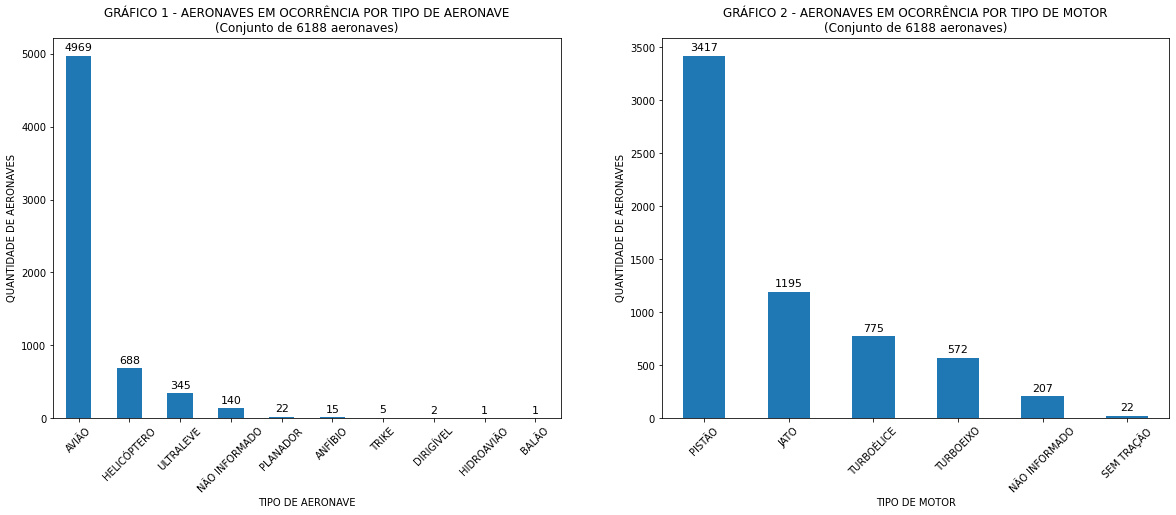

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=False)

# Dados do gráfico 1  
dados_tipo_aeronave = dados.groupby('aeronave_tipo_veiculo')['aeronave_tipo_veiculo'].count()

tamanho_conjunto = len(dados)

# Gráfico 1
plot = dados_tipo_aeronave.sort_values(ascending=False).plot(ax=axes[0],kind='bar')

autolabel('bar')
axes[0].set_title(f'GRÁFICO 1 - AERONAVES EM OCORRÊNCIA POR TIPO DE AERONAVE\n(Conjunto de {tamanho_conjunto} aeronaves)')
axes[0].set_xlabel('TIPO DE AERONAVE')
axes[0].set_ylabel('QUANTIDADE DE AERONAVES')
axes[0].tick_params('x', labelrotation=45)

# Dados do gráfico 2  
dados_tipo_motor = dados.groupby('aeronave_motor_tipo')['aeronave_motor_tipo'].count()

tamanho_conjunto = len(dados)

# Gráfico 2
plot = dados_tipo_motor.sort_values(ascending=False).plot(ax=axes[1],kind='bar')
autolabel('bar')
axes[1].set_title(f'GRÁFICO 2 - AERONAVES EM OCORRÊNCIA POR TIPO DE MOTOR\n(Conjunto de {tamanho_conjunto} aeronaves)')
axes[1].set_xlabel('TIPO DE MOTOR')
axes[1].set_ylabel('QUANTIDADE DE AERONAVES')
axes[1].tick_params('x', labelrotation=45)

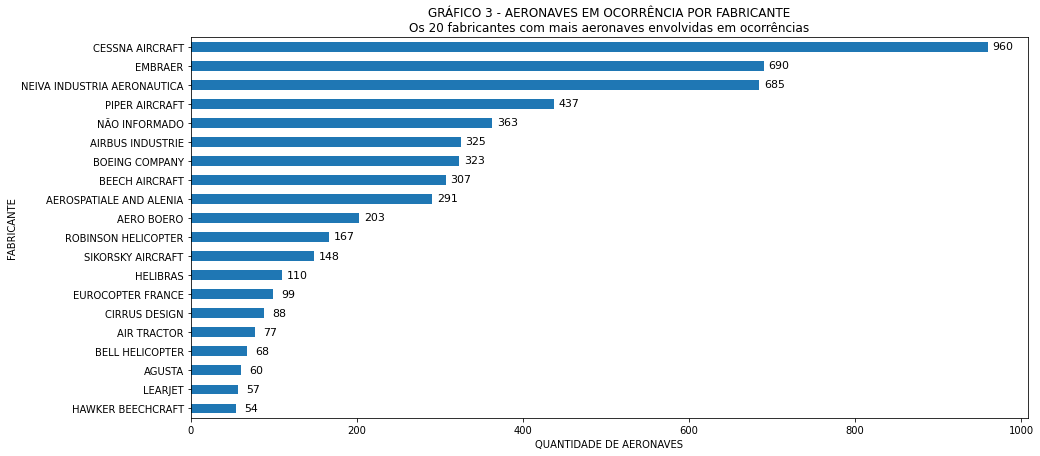

In [ ]:
# Dados do gráfico 3
dados_fabricante_aeronave = dados.groupby('aeronave_fabricante')['aeronave_fabricante'].count().sort_values()

# Gráfico 3
plot = dados_fabricante_aeronave.tail(20).plot(kind='barh', figsize=(15, 7))
autolabel('barh')
plot.set_title('GRÁFICO 3 - AERONAVES EM OCORRÊNCIA POR FABRICANTE\nOs 20 fabricantes com mais aeronaves envolvidas em ocorrências')
plot.set_xlabel('QUANTIDADE DE AERONAVES')
plot.set_ylabel('FABRICANTE')
plot.tick_params('x', labelrotation=0)

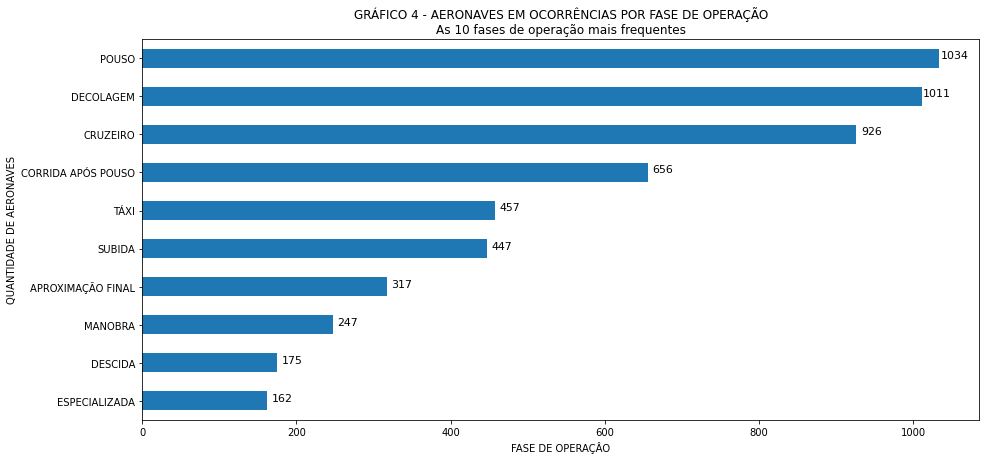

In [ ]:
# Dados do gráfico 4
dados_fase_operacao = dados.groupby('aeronave_fase_operacao')\
                      ['aeronave_fase_operacao'].count()

tamanho_conjunto = len(dados)

# Gráfico 4
plot = dados_fase_operacao.sort_values().tail(10).plot(kind='barh', figsize=(15, 7))
autolabel('barh')
plot.set_title(f'GRÁFICO 4 - AERONAVES EM OCORRÊNCIAS POR FASE DE OPERAÇÃO\n' +
               f'As 10 fases de operação mais frequentes')
plot.set_xlabel('FASE DE OPERAÇÂO')
plot.set_ylabel('QUANTIDADE DE AERONAVES')
plot.tick_params('x', labelrotation=0)

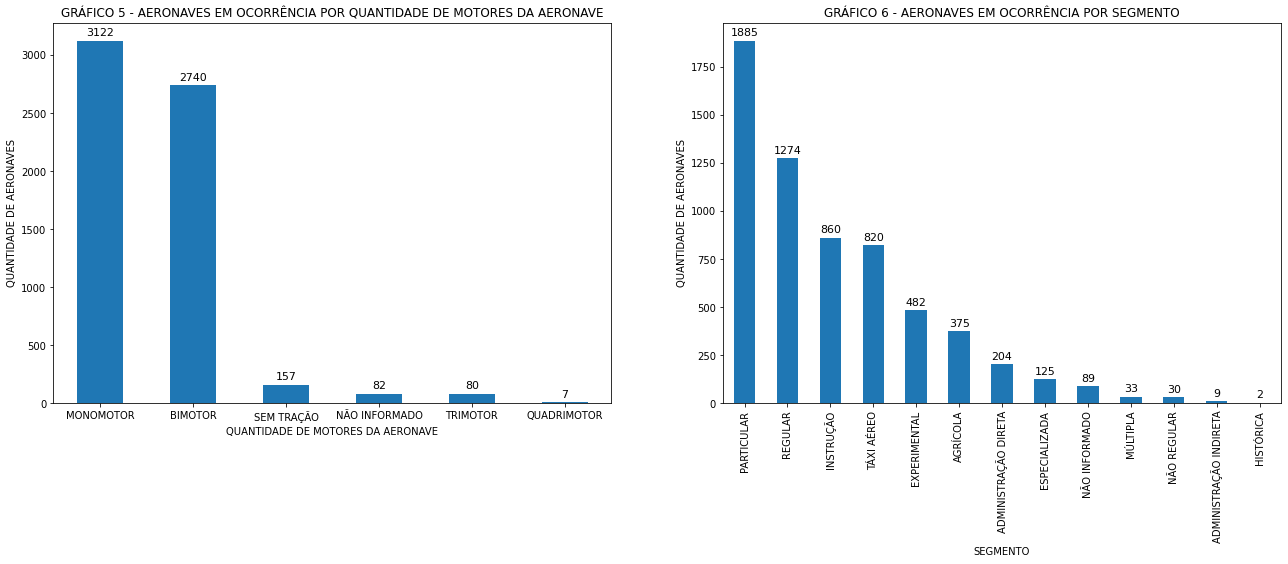

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(22, 7), sharey=False)

# Dados do gráfico 5  
dados_quantidade_motor = dados.groupby('aeronave_motor_quantidade')['aeronave_motor_quantidade'].count()

# Gráfico 5
plot = dados_quantidade_motor.sort_values(ascending=False).plot(ax=axes[0],kind='bar')
autolabel('bar')
axes[0].set_title('GRÁFICO 5 - AERONAVES EM OCORRÊNCIA POR QUANTIDADE DE MOTORES DA AERONAVE')
axes[0].set_xlabel('QUANTIDADE DE MOTORES DA AERONAVE')
axes[0].set_ylabel('QUANTIDADE DE AERONAVES')
axes[0].tick_params('x', labelrotation=0)

# Dados do gráfico 6  
dados_registro_segmento = dados.groupby('aeronave_registro_segmento')\
                          ['aeronave_registro_segmento'].count()

# Gráfico 6
plot = dados_registro_segmento.sort_values(ascending=False).plot(ax=axes[1],kind='bar')
autolabel('bar')
axes[1].set_title('GRÁFICO 6 - AERONAVES EM OCORRÊNCIA POR SEGMENTO')
axes[1].set_xlabel('SEGMENTO')
axes[1].set_ylabel('QUANTIDADE DE AERONAVES')
axes[1].tick_params('x', labelrotation=90)

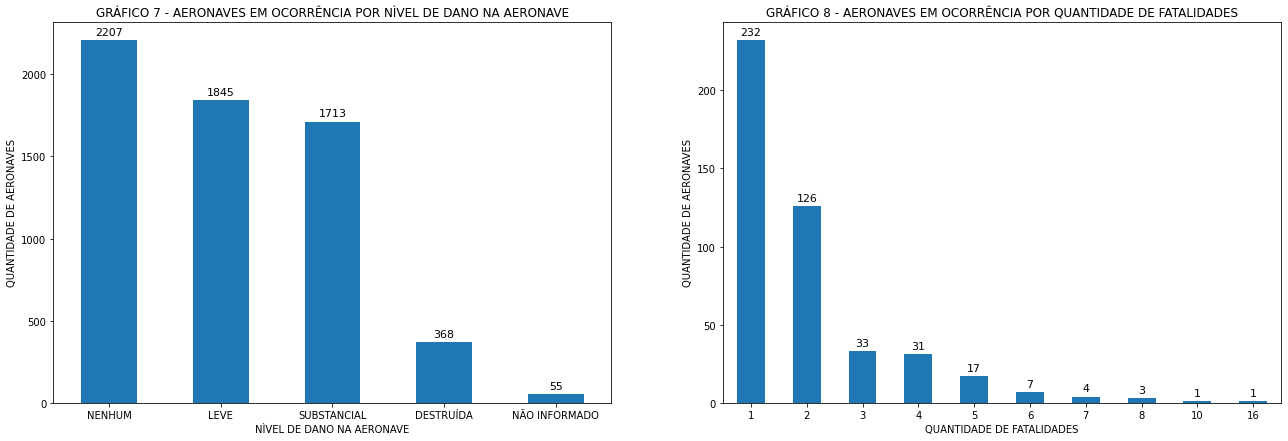

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(22, 7), sharey=False)

# Dados do gráfico 7  
dados_nivel_dano = dados.groupby('aeronave_nivel_dano')['aeronave_nivel_dano'].count()

# Gráfico 7
plot = dados_nivel_dano.sort_values(ascending=False).plot(ax=axes[0], kind='bar')
autolabel('bar')
axes[0].set_title('GRÁFICO 7 - AERONAVES EM OCORRÊNCIA POR NÌVEL DE DANO NA AERONAVE')
axes[0].set_xlabel('NÌVEL DE DANO NA AERONAVE')
axes[0].set_ylabel('QUANTIDADE DE AERONAVES')
axes[0].tick_params('x', labelrotation=0)

# Dados do gráfico 8  
selecao = dados[dados['aeronave_fatalidades_total'] > 0]
dados_fatalidade = selecao.groupby('aeronave_fatalidades_total')['aeronave_fatalidades_total'].count()

# Gráfico 8
plot = dados_fatalidade.plot(ax=axes[1], kind='bar')
autolabel('bar')
axes[1].set_title('GRÁFICO 8 - AERONAVES EM OCORRÊNCIA POR QUANTIDADE DE FATALIDADES')
axes[1].set_xlabel('QUANTIDADE DE FATALIDADES')
axes[1].set_ylabel('QUANTIDADE DE AERONAVES')
axes[1].tick_params('x', labelrotation=0)

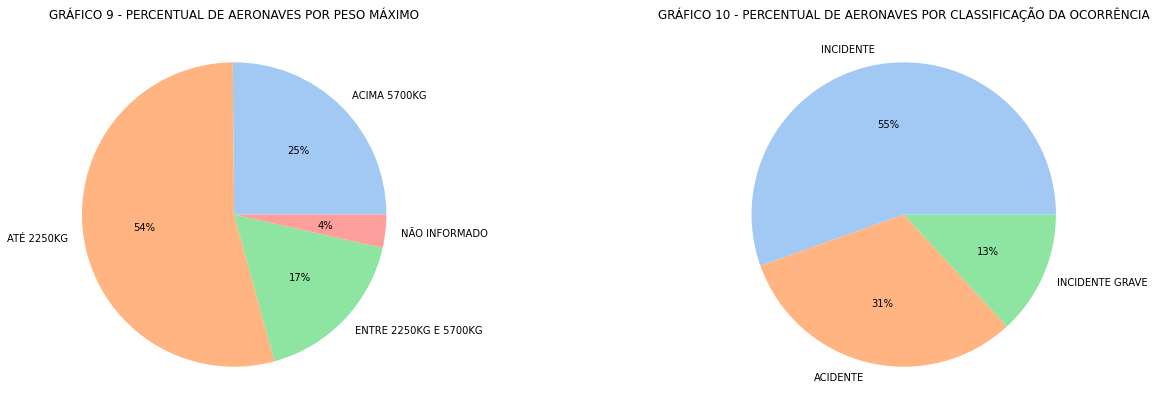

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(22, 7), sharey=False)

colors = sns.color_palette('pastel')[0:5]

# Dados do Gráfico 9
dados_peso_maximo = dados.groupby('aeronave_peso_maximo_decolagem')['aeronave_peso_maximo_decolagem'].count()

#Gráfico 9
axes[0].pie(dados_peso_maximo, labels = dados_peso_maximo.index, colors = colors, autopct='%.0f%%')
axes[0].set_title('GRÁFICO 9 - PERCENTUAL DE AERONAVES POR PESO MÁXIMO')

# Dados do gráfico 10  
dados_classificacao_ocorrencia = dados.groupby('ocorrencia_classificacao')['ocorrencia_classificacao'].count().sort_values(ascending=False)

# Gráfico 10
axes[1].pie(dados_classificacao_ocorrencia, labels=dados_classificacao_ocorrencia.index, colors = colors, autopct='%.0f%%')
axes[1].set_title('GRÁFICO 10 - PERCENTUAL DE AERONAVES POR CLASSIFICAÇÃO DA OCORRÊNCIA')

plt.show()


**DESCREVER O QUE É INCIDENTE, ACIDENTE e INCIDENTE GRAVE**

**Acidente**

É toda ocorrência relacionada com a operação de uma aeronave, havida entre o
período em que uma pessoa nela embarca com a intenção de realizar um vôo, até
o momento em que todas as pessoas tenham dela desembarcado e, durante o
qual, pelo menos uma das situações abaixo ocorra:

a) qualquer pessoa sofra lesão grave ou morra como resultado de estar na
aeronave
b) a aeronave sofra dano ou falha estrutural que afete adversamente a
resistência estrutural, o seu desempenho ou as suas características de vôo;
exija a substituição de grandes componentes ou a realização de grandes
reparos no componente afetado
c)a aeronave seja considerada desaparecida ou o local onde se encontre
seja absolutamente inacessível.

**Incidente**

Incidente aeronáutico por definição, é toda ocorrência inclusive de tráfego
aéreo associada a operação de uma aeronave, havendo intenções de vôo,
que não se chegue a se caracterizar como um acidente mas que afete ou
possa afetar a segurança da operação.

**Incidente Grave**

Incidente ocorrido sob circunstâncias em que um acidente quase ocorreu. A
diferença entre o incidente grave e o acidente está apenas nas
Conseqüências.


Text(0, 0.5, 'QUANTIDADE DE AERONAVES')

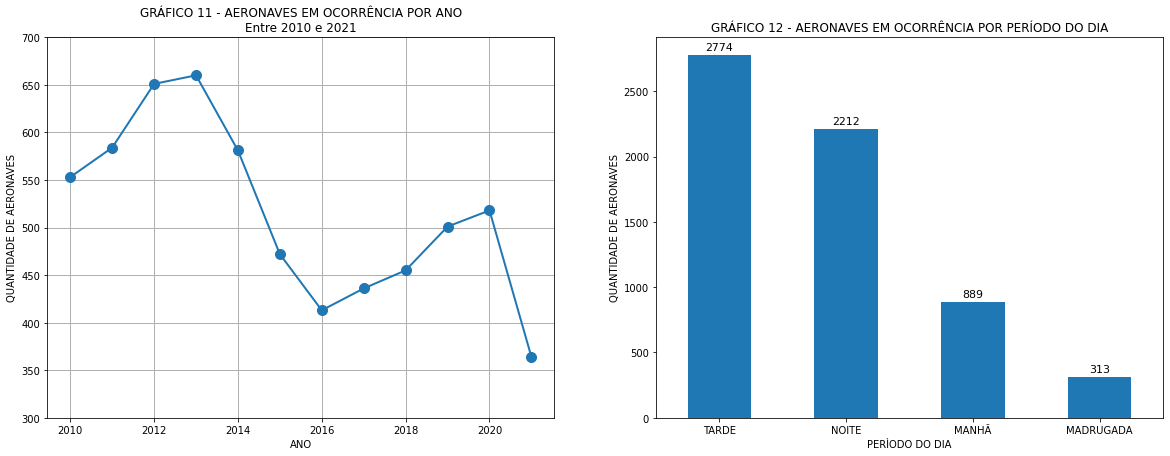

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=False)

# Dados do gráfico 11  
dados_ano_ocorrencia = dados.groupby('ocorrencia_ano')['ocorrencia_ano'].count()

# Gráfico 11
axes[0].plot(dados_ano_ocorrencia.index, dados_ano_ocorrencia,linewidth=2, marker=".", markersize=20.0)
axes[0].set_title('GRÁFICO 11 - AERONAVES EM OCORRÊNCIA POR ANO\nEntre 2010 e 2021')
axes[0].set_xlabel('ANO')
axes[0].set_ylabel('QUANTIDADE DE AERONAVES')
axes[0].set_ylim(300, 700)
axes[0].grid( linestyle='-', linewidth=1)

# Dados do Gráfico 12
dados_periodo_ocorrencia = dados.groupby('ocorrencia_periodo')['ocorrencia_periodo'].count()

# Gráfico 12
plot = dados_periodo_ocorrencia.sort_values(ascending=False).plot(ax=axes[1],kind='bar')
autolabel('bar')
axes[1].tick_params('x', labelrotation=0)
axes[1].set_title('GRÁFICO 12 - AERONAVES EM OCORRÊNCIA POR PERÍODO DO DIA')
axes[1].set_xlabel('PERÌODO DO DIA')
axes[1].set_ylabel('QUANTIDADE DE AERONAVES')

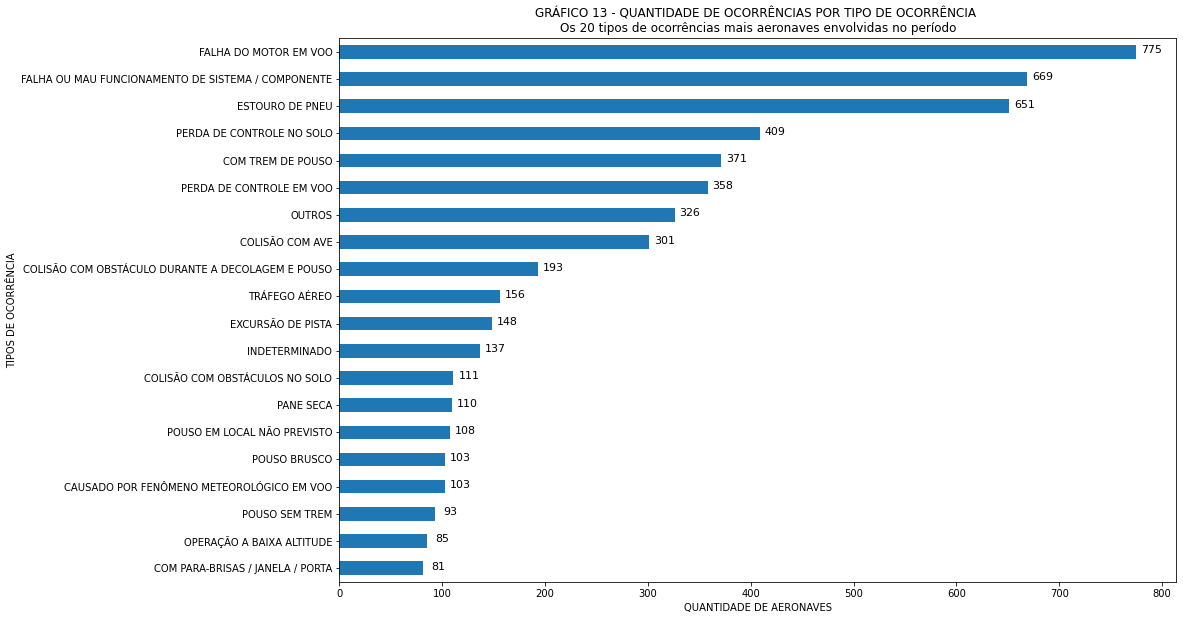

In [ ]:
# Dados do gráfico 13
dados_tipo_ocorrencia = dados.groupby('ocorrencia_tipo')['ocorrencia_tipo'].count().sort_values().tail(20)

# Gráfico 13
plot = dados_tipo_ocorrencia.tail(20).plot(kind='barh', figsize=(15, 10))
autolabel('barh')
plot.set_title('GRÁFICO 13 - QUANTIDADE DE OCORRÊNCIAS POR TIPO DE OCORRÊNCIA \n'+ 
                  'Os 20 tipos de ocorrências mais aeronaves envolvidas no período')
plot.set_xlabel('QUANTIDADE DE AERONAVES')
plot.set_ylabel('TIPOS DE OCORRÊNCIA')
plot.tick_params('x', labelrotation=0)

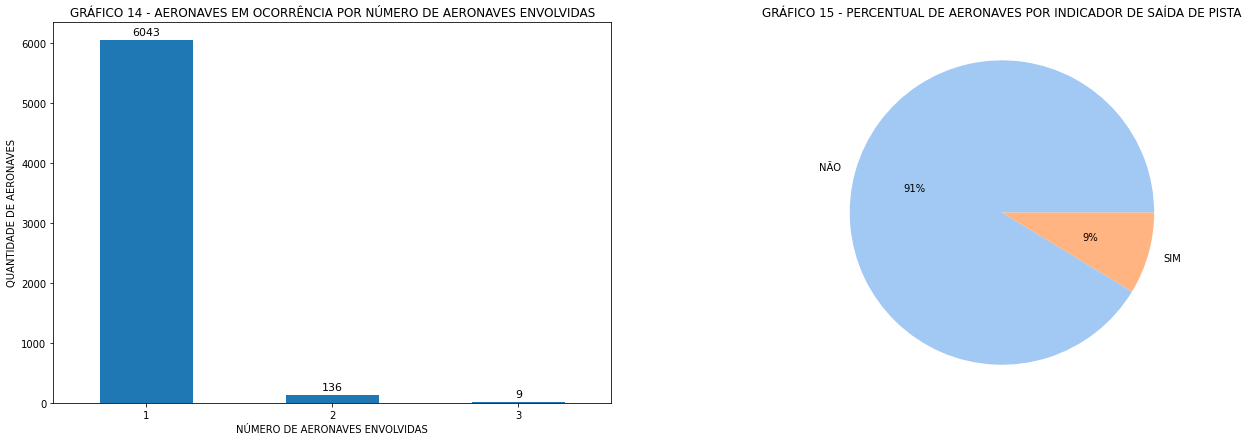

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(22, 7), sharey=False)

# Dados do gráfico 14
dados_aeronaves_envolvidas = dados.groupby('ocorrencia_aeronaves_envolvidas')['ocorrencia_aeronaves_envolvidas'].count()

# Gráfico 14
plot = dados_aeronaves_envolvidas.sort_values(ascending=False).plot(ax=axes[0],kind='bar')
autolabel('bar')
axes[0].tick_params('x', labelrotation=0)
axes[0].set_title('GRÁFICO 14 - AERONAVES EM OCORRÊNCIA POR NÚMERO DE AERONAVES ENVOLVIDAS')
axes[0].set_xlabel('NÚMERO DE AERONAVES ENVOLVIDAS')
axes[0].set_ylabel('QUANTIDADE DE AERONAVES')

colors = sns.color_palette('pastel')[0:5]

# Dados do gráfico 15  
dados_saida_pista = dados.groupby('ocorrencia_saida_pista')['ocorrencia_saida_pista'].count()

# Gráfico 15
axes[1].pie(dados_saida_pista, labels=dados_saida_pista.index, colors = colors, autopct='%.0f%%')
axes[1].set_title('GRÁFICO 15 - PERCENTUAL DE AERONAVES POR INDICADOR DE SAÍDA DE PISTA')

plt.show()


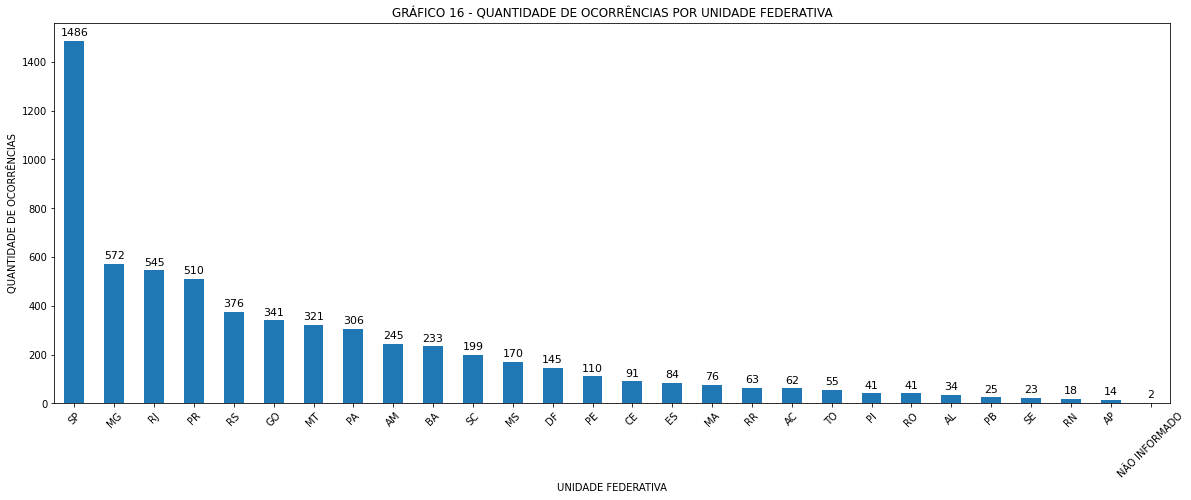

In [ ]:
# Dados do gráfico 16
dados_uf_ocorrencia = dados.groupby('ocorrencia_uf')['ocorrencia_uf'].count()

# Gráfico 16
plot = dados_uf_ocorrencia.sort_values(ascending=False).plot(kind='bar', figsize=(20, 7))
autolabel('bar')
plot.set_title('GRÁFICO 16 - QUANTIDADE DE OCORRÊNCIAS POR UNIDADE FEDERATIVA')
plot.set_xlabel('UNIDADE FEDERATIVA')
plot.set_ylabel('QUANTIDADE DE OCORRÊNCIAS')
plot.tick_params('x', labelrotation=45)

In [ ]:
round((dados.groupby('ocorrencia_uf')['ocorrencia_uf'].count()/6188)*100,ndigits=2)

ocorrencia_uf
AC                1.00
AL                0.55
AM                3.96
AP                0.23
BA                3.77
CE                1.47
DF                2.34
ES                1.36
GO                5.51
MA                1.23
MG                9.24
MS                2.75
MT                5.19
NÃO INFORMADO     0.03
PA                4.95
PB                0.40
PE                1.78
PI                0.66
PR                8.24
RJ                8.81
RN                0.29
RO                0.66
RR                1.02
RS                6.08
SC                3.22
SE                0.37
SP               24.01
TO                0.89
Name: ocorrencia_uf, dtype: float64

## Cruzamento de atributos

Text(0, 0.5, 'NÚMERO DE FATALIDADES')

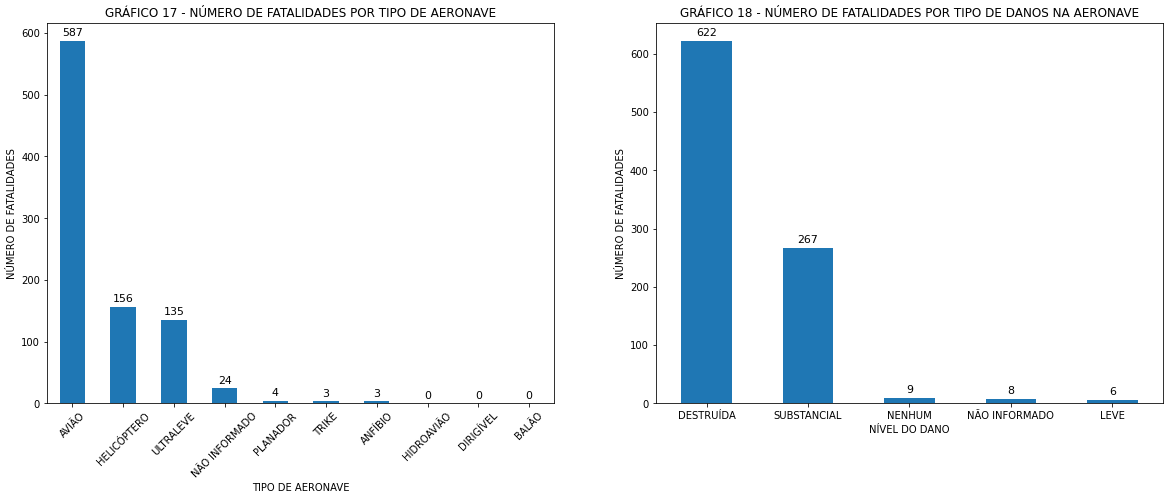

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=False)

# Dados do gráfico 17
dados_fatalidades_tipo = dados.groupby('aeronave_tipo_veiculo')['aeronave_fatalidades_total'].sum()

# Gráfico 17
plot = dados_fatalidades_tipo.sort_values(ascending=False).plot(ax=axes[0],kind='bar')
autolabel('bar')
axes[0].tick_params('x', labelrotation=45)
axes[0].set_title('GRÁFICO 17 - NÚMERO DE FATALIDADES POR TIPO DE AERONAVE')
axes[0].set_xlabel('TIPO DE AERONAVE')
axes[0].set_ylabel('NÚMERO DE FATALIDADES')

# Dados do gráfico 18
dados_fatalidades_nivel = dados.groupby('aeronave_nivel_dano')['aeronave_fatalidades_total'].sum()

# Gráfico 18
plot = dados_fatalidades_nivel.sort_values(ascending=False).plot(ax=axes[1], kind='bar')
autolabel('bar')
axes[1].tick_params('x', labelrotation=0)
axes[1].set_title('GRÁFICO 18 - NÚMERO DE FATALIDADES POR TIPO DE DANOS NA AERONAVE')
axes[1].set_xlabel('NÍVEL DO DANO')
axes[1].set_ylabel('NÚMERO DE FATALIDADES')

Text(0, 0.5, 'NÚMERO DE FATALIDADES')

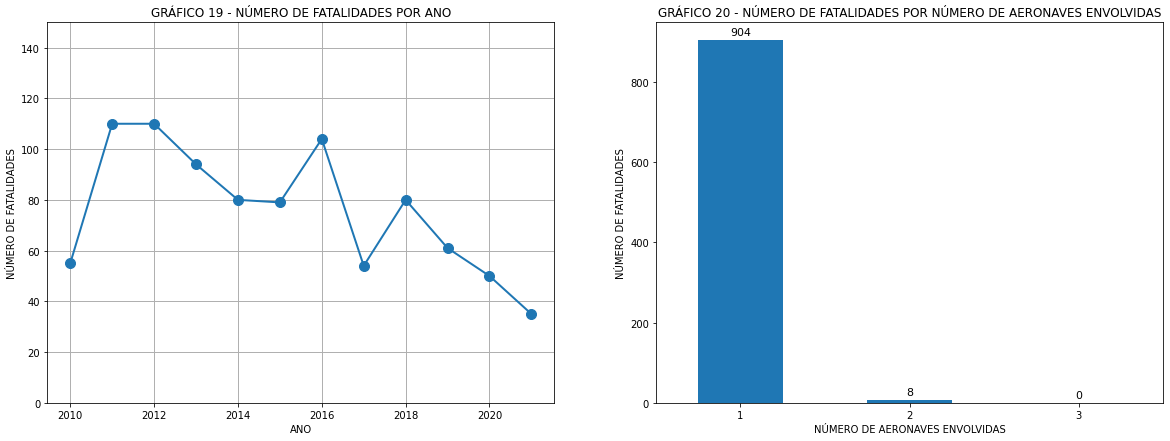

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=False)

# Dados do gráfico 19  
dados_fatalidades_ano = dados.groupby('ocorrencia_ano')['aeronave_fatalidades_total'].sum()

# Gráfico 19
axes[0].plot(dados_fatalidades_ano.index, dados_fatalidades_ano,linewidth=2, marker=".", markersize=20.0)
axes[0].set_title('GRÁFICO 19 - NÚMERO DE FATALIDADES POR ANO')
axes[0].set_xlabel('ANO')
axes[0].set_ylabel('NÚMERO DE FATALIDADES')
axes[0].set_ylim(0, 150)
axes[0].grid( linestyle='-', linewidth=1)

# Dados do gráfico 20
dados_fatalidades_nivel = dados.groupby('ocorrencia_aeronaves_envolvidas')['aeronave_fatalidades_total'].sum()

# Gráfico 20
plot = dados_fatalidades_nivel.sort_values(ascending=False).plot(ax=axes[1], kind='bar')
autolabel('bar')
axes[1].tick_params('x', labelrotation=0)
axes[1].set_title('GRÁFICO 20 - NÚMERO DE FATALIDADES POR NÚMERO DE AERONAVES ENVOLVIDAS')
axes[1].set_xlabel('NÚMERO DE AERONAVES ENVOLVIDAS')
axes[1].set_ylabel('NÚMERO DE FATALIDADES')

In [ ]:
dados_fatalidades_ano

ocorrencia_ano
2010     55
2011    110
2012    110
2013     94
2014     80
2015     79
2016    104
2017     54
2018     80
2019     61
2020     50
2021     35
Name: aeronave_fatalidades_total, dtype: int64

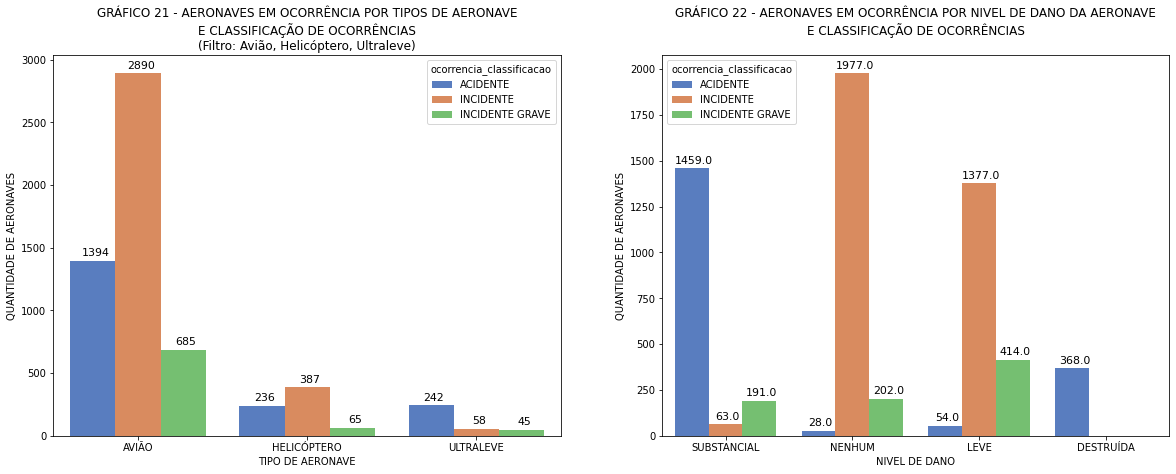

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=False)

# Dados do gráfico 21
selecao = dados.query("aeronave_tipo_veiculo in ['AVIÃO','HELICÓPTERO','ULTRALEVE']")

# Gráfico 21
plot = sns.countplot(ax=axes[0], x='aeronave_tipo_veiculo',data=selecao, palette='muted',hue='ocorrencia_classificacao')
axes[0].tick_params('x', labelrotation=0)
axes[0].set_title('GRÁFICO 21 - AERONAVES EM OCORRÊNCIA POR TIPOS DE AERONAVE\n'+
                  'E CLASSIFICAÇÃO DE OCORRÊNCIAS\n'+
                  '(Filtro: Avião, Helicóptero, Ultraleve)')
axes[0].set_xlabel('TIPO DE AERONAVE')
axes[0].set_ylabel('QUANTIDADE DE AERONAVES')

for p in plot.patches:
  plot.annotate(format(p.get_height()), 
                xy = (p.get_x()+0.15, p.get_height()),
                xytext=(0, 8),
                textcoords='offset points',
                ha='center', 
                va='center',
                size=11)

# Dados do gráfico 22  
selecao = dados.query("aeronave_nivel_dano in ['DESTRUÍDA','SUBSTANCIAL','LEVE','NENHUM']")

# Gráfico 22
plot = sns.countplot(ax=axes[1],x='aeronave_nivel_dano',data=selecao, palette='muted',hue='ocorrencia_classificacao')
axes[1].tick_params('x', labelrotation=0)
axes[1].set_title('GRÁFICO 22 - AERONAVES EM OCORRÊNCIA POR NIVEL DE DANO DA AERONAVE\n'+
                  'E CLASSIFICAÇÃO DE OCORRÊNCIAS\n')
axes[1].set_xlabel('NIVEL DE DANO')
axes[1].set_ylabel('QUANTIDADE DE AERONAVES')

for p in plot.patches:
  plot.annotate(format(p.get_height()), 
                xy = (p.get_x()+0.15, p.get_height()),
                xytext=(0, 8),
                textcoords='offset points',
                ha='center', 
                va='center',
                size=11)


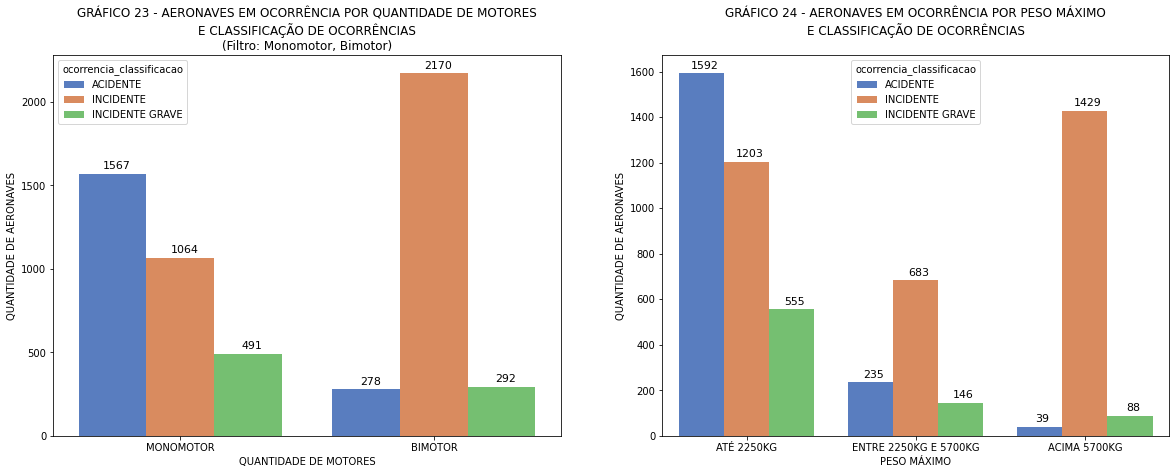

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=False)

# Dados do gráfico 23
selecao = dados.query("aeronave_motor_quantidade in ['BIMOTOR','MONOMOTOR']")

# Gráfico 23
plot = sns.countplot(ax=axes[0],x='aeronave_motor_quantidade',data=selecao, palette='muted',hue='ocorrencia_classificacao')
axes[0].tick_params('x', labelrotation=0)
axes[0].set_title('GRÁFICO 23 - AERONAVES EM OCORRÊNCIA POR QUANTIDADE DE MOTORES\n'+
                  'E CLASSIFICAÇÃO DE OCORRÊNCIAS\n'+
                  '(Filtro: Monomotor, Bimotor)')
axes[0].set_xlabel('QUANTIDADE DE MOTORES')
axes[0].set_ylabel('QUANTIDADE DE AERONAVES')

for p in plot.patches:
  plot.annotate(format(p.get_height()), 
                xy = (p.get_x()+0.15, p.get_height()),
                xytext=(0, 8),
                textcoords='offset points',
                ha='center', 
                va='center',
                size=11)

# Dados do gráfico 24  
selecao = dados.query("aeronave_peso_maximo_decolagem in ['ATÉ 2250KG','ACIMA 5700KG','ENTRE 2250KG E 5700KG']")

# Gráfico 24
plot = sns.countplot(ax=axes[1],x='aeronave_peso_maximo_decolagem',data=selecao, palette='muted',hue='ocorrencia_classificacao')
axes[1].tick_params('x', labelrotation=0)
axes[1].set_title('GRÁFICO 24 - AERONAVES EM OCORRÊNCIA POR PESO MÁXIMO\n'+
                  'E CLASSIFICAÇÃO DE OCORRÊNCIAS\n')
axes[1].set_xlabel('PESO MÁXIMO')
axes[1].set_ylabel('QUANTIDADE DE AERONAVES')

for p in plot.patches:
  plot.annotate(format(p.get_height()), 
                xy = (p.get_x()+0.15, p.get_height()),
                xytext=(0, 8),
                textcoords='offset points',
                ha='center', 
                va='center',
                size=11)

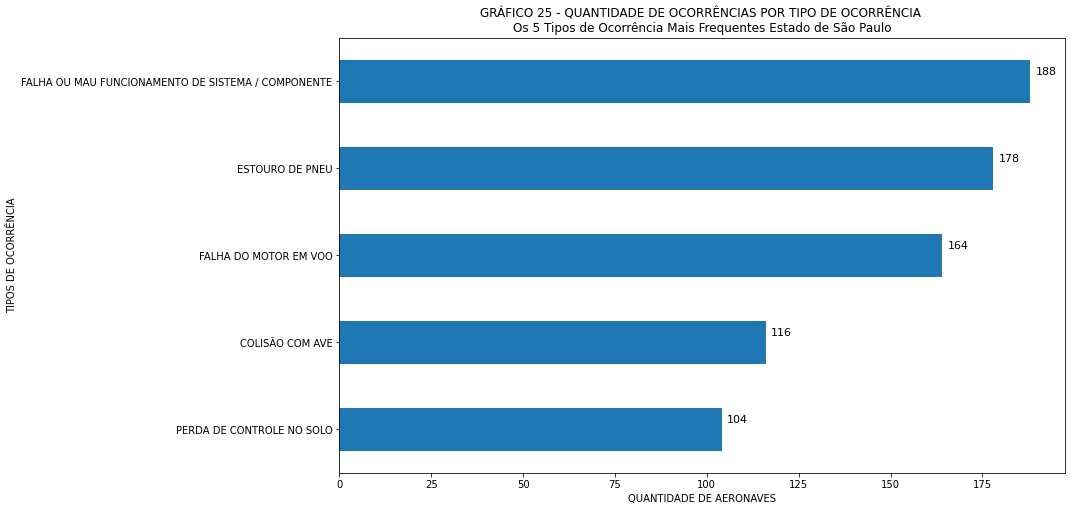

In [ ]:
# Dados do gráfico 25
selecao = dados[dados['ocorrencia_uf'] == 'SP']
dados_tipo_ocorrencia = selecao.groupby('ocorrencia_tipo')['ocorrencia_tipo'].count().sort_values().tail(5)

# Gráfico 25
plot = dados_tipo_ocorrencia.tail(20).plot(kind='barh', figsize=(13, 8))
autolabel('barh')
plot.set_title('GRÁFICO 25 - QUANTIDADE DE OCORRÊNCIAS POR TIPO DE OCORRÊNCIA \n'+ 
                  'Os 5 Tipos de Ocorrência Mais Frequentes Estado de São Paulo')
plot.set_xlabel('QUANTIDADE DE AERONAVES')
plot.set_ylabel('TIPOS DE OCORRÊNCIA')
plot.tick_params('x', labelrotation=0)